In [1]:
# This notebook has dependencies on 'Numpy' and 'OpenCV'
# Open cmd terminal and run the following command to get them installed (passwd: prime)
# "sudo pip install numpy opencv-python"

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Opencv is a library that supports computer vision algorithms.
# Image segmentation is a problem that has a natural correspondence with Clustering
# We will look at the use of KMeans in segmenting images

In [4]:
# You will have to upload the 3 images to google colab. We have uploaded files before. Check them for reference
# Step 1:
# Use the function cv2.imread() to read the original image. (Pick any of your favourite among the 3)

For Reference:
[Link](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html#read-an-image)

## OpenCV and images

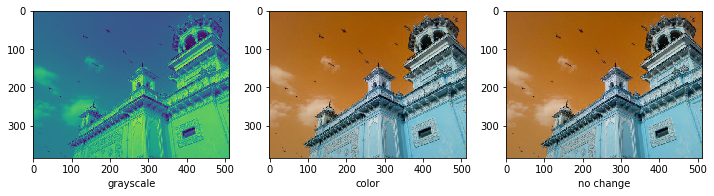

In [5]:
# cv2.imread() to read an image
# Second argument is a flag which specifies the way image should be read.
# - cv2.IMREAD_COLOR : i.e. 1; Loads a color image. Any transparency of image will be neglected. It is the default flag.
# - cv2.IMREAD_GRAYSCALE : i.e. 0; Loads image in grayscale mode
# - cv2.IMREAD_UNCHANGED : i.e. -1; Loads image as such including alpha channel
imageGrayscale = cv2.imread("kmeans_opencv/home.jpg", cv2.IMREAD_GRAYSCALE)
imageColor = cv2.imread("kmeans_opencv/home.jpg", cv2.IMREAD_COLOR)
imageUnchanged = cv2.imread("kmeans_opencv/home.jpg", cv2.IMREAD_UNCHANGED)

figure = plt.figure(figsize=(10.0, 3.0))

axes1 = figure.add_subplot(1, 3, 1)
axes2 = figure.add_subplot(1, 3, 2)
axes3 = figure.add_subplot(1, 3, 3)

axes1.set_xlabel('grayscale')
axes1.imshow(imageGrayscale)

axes2.set_xlabel('color')
axes2.imshow(imageColor)

axes3.set_xlabel('no change')
axes3.imshow(imageUnchanged)

figure.tight_layout()
plt.show()

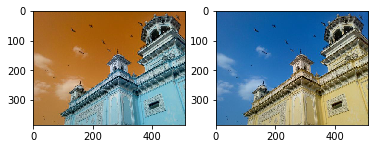

In [6]:
# Color image loaded by OpenCV is in BGR mode. But Matplotlib displays in RGB mode. 
# So color images will not be displayed correctly in Matplotlib
b,g,r = cv2.split(imageColor)
imageColorRGB = cv2.merge([r,g,b])
plt.subplot(121);
plt.imshow(imageColor) # expects distorted color

plt.subplot(122);
plt.imshow(imageColorRGB) # expect true color
plt.show()

In [7]:
# Get Number of Channels
# Grayscale images have 1 dimension
# Color images have 3 (corresponding to RGB)
grayscaleChannel = imageGrayscale.ndim
grayscaleChannel

colorChannel = imageColor.ndim
colorChannel

3

In [8]:
# Grayscale and Color images are stored as [x_dim,y_dim,1], and [x_dim,y_dim,3] matrices respectively.
# A commonly used Computer Vision technique to reduce dimensions of image is to "vectorize" them.
# Meaning [x_dim,y_dim,1] ==> [new_dim,1]  : For Grayscale images
# Meaning [x_dim,y_dim,3] ==> [new_dim,3]  : For Color images
# How do we do this? Hint (We should "reshape" a numpy array)
# Why do we need this?

In [9]:
image = imageGrayscale.reshape(-1,3)
image

array([[ 88,  87,  85],
       [ 84,  84,  85],
       [ 87,  88,  86],
       ..., 
       [177, 175, 175],
       [175, 175, 175],
       [174, 174, 174]], dtype=uint8)

In [10]:
# Now we have an image vector that can be processed by K-Means algorithm
# Study the cv2 documentation for using K-Means and feed in all the required parameters as its input
# Note that these parameters decide the quality of your segmentation.
# Most of ML is tuning these so-called "hyperparameters" and finding the best ones.
# Feel free to experiment on these parameters

For Reference:
[Link](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)

In [11]:
# samples should be of np.float32 data type, and each feature should be put in a single column.
image = np.float32(image)

# iteration termination criteria
# - cv2.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
# - cv2.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter. 
# - cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
# define 
# - criteria, 
# - number of clusters required at end = (K) 
# - and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret, label, center = cv2.kmeans(image,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [12]:
# The output parameters are : Compactness, labels, and centers
# What do they mean? Would you desire more compactness? Is that always good?
# Experiment on different images and hyperparameters and check the quality of segmentation
# and try to analyze if compactness is a good measure of clustering

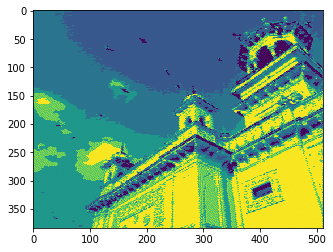

In [13]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
result = center[label.flatten()]
resultReshaped = result.reshape((imageGrayscale.shape))

plt.imshow(resultReshaped)

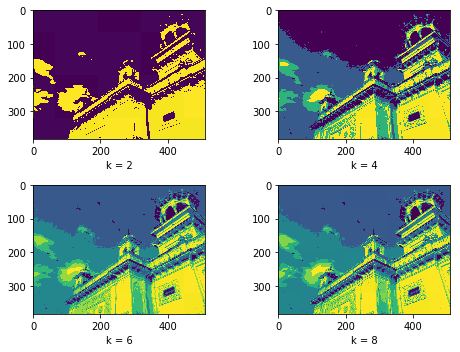

In [14]:
subplot = {2: 221, 4: 222, 6: 223, 8: 224}

figure = plt.figure(figsize=(7.0, 5.0))

for k in subplot.keys():
    ret, label, center = cv2.kmeans(image,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    resultReshaped = result.reshape((imageGrayscale.shape))
    plt.subplot(subplot[k]);
    plt.xlabel("k = %d"%k)
    plt.imshow(resultReshaped)

figure.tight_layout()
plt.show()

In [15]:
# Remember cv2.imread() which we used to read an image,in Step 1
# Now use cv2.imshow() to show the image that was read in Step 1
# This is the original image

For Reference:
[Link](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html#display-an-image)

In [16]:
# cv2.imshow('image', imageGrayscale)

In [17]:
# It is good practice to add the following two lines of code when using imshow()
# This makes the image display wait until ESC key is pressed
# So you can see the image and close it by hitting the ESC key whenever you need to

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [18]:
# Look at the labels array that is the output of K-Means
# This is an image vector denoting the cluster assigment of shape [new_dim,1]
# How can we transform this into a grayscale image?
# This is basically the inverse of "vectorize" operation we did at the start
# [new_dim,1] ==> [x_dim,y_dim,1]

In [19]:
# Also note that image intensity is always between [0->255]
# We will have to scale the cluster assignment in label to this range
# Meaning, if the cluster assignment was [0,1,2], we should scale it to [0, 127, 255]

In [20]:
# Now display this image
# This should be a grayscale image showing the labelling of K-Means

In [21]:
# Can we show the segmentation result as a color image instead of grayscale?
# One way to do this, is to assign the (RGB) intensity values of cluster centroids as the
# RGB intensity values of all pixels belonging to that cluster.
# Is this always a good way? Think of KMeans convergence and what if the centroids had same color
# Lets anyway stick to this approach
# To do this, you have to do the following:
# For example, consider we have 3 clusters with centroids c0,c1,c2
# Now look at all the pixels of the labels image (which stores the cluster assignment -> 0,1,2)
# All pixels with label 0, need to have intensity of c0, and so on for 1 and 2.

In [22]:
# Display this color image showing segmentation results

In [23]:
# Now try the other images available, and also see if the same hyperparameter settings do justice to them as well
# You can repeat by simply re-running this notebook with new image file and hyperparameters